In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
results_folder =  '/home/alalbiol/Programacion/Mammography/results_alemania/785_estudios_Diciembre_2023_Enero_2024'

In [7]:
df_birads = pd.read_csv('/home/alalbiol/Programacion/Mammography/results_alemania/785_estudios_Diciembre_2023_Enero_2024/ai_mg_birad.csv')

In [21]:
df_birads.head()
print(df_birads.columns)
df_birads.columns = ['PatientID', 'accessionNumber', ' StudyInstanceUID', 'Birads',
       ' StudyDate', ' ImageCounter', ' ImagePath']


Index(['PatientID', 'accessionNumber', ' StudyInstanceUID', 'Birads',
       ' StudyDate', ' ImageCounter', ' ImagePath'],
      dtype='object')


In [24]:

#group by AccessionNumber and take the mean of the birads
df_birads_g = df_birads.groupby('accessionNumber')['Birads'].mean().reset_index()
df_birads_g.set_index('accessionNumber', inplace=True)
print(df_birads_g.head())

                 Birads
accessionNumber        
1644981             3.0
1644998             3.0
1645002             2.0
1645029             3.0
1645085             2.0


In [23]:
filename = '/home/alalbiol/Programacion/Mammography/results_alemania/785_estudios_Diciembre_2023_Enero_2024/predictions.tsv'
ai_results = pd.read_csv(filename, sep='\t')
print(ai_results.head())

   subjectId  examIndex laterality  accessionNumber      date  confidence
0    1009356          1          L          1680192  20240201    0.072196
1    1009356          1          R          1680192  20240201    0.038174
2    1009973          1          L          1678636  20240131    0.244670
3    1009973          1          R          1678636  20240131    0.069748
4    1010144          1          L          1682791  20240207    0.182365


In [32]:
def getBirads(accesionNumber):
    if accesionNumber in df_birads_g.index:
        return df_birads_g.loc[accesionNumber]['Birads']
    else:
        print("not found", accesionNumber)
        return None

ai_results['Birads'] = ai_results['accessionNumber'].apply(lambda X: getBirads(X))

not found 1657069
not found 1657069


In [33]:
ai_results.dropna(subset=['Birads'], inplace=True)

Birads
0     98
1    226
2    953
3    141
4     87
5     18
6      2
Name: count, dtype: int64


Text(0.5, 1.0, 'Birads distribution (images)')

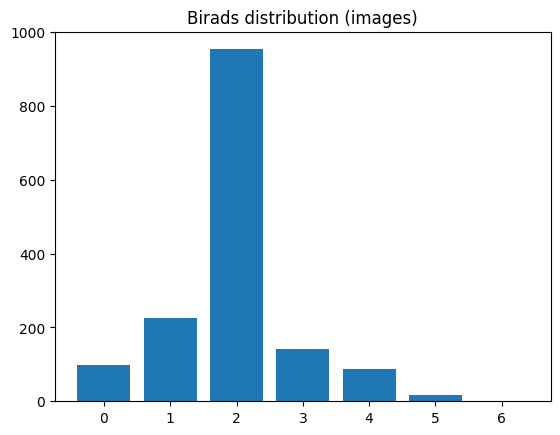

In [55]:
birads_counts = ai_results.Birads.value_counts()
birads_counts = birads_counts.sort_index()
print(birads_counts)
plt.bar(birads_counts.index, birads_counts.values)
plt.title('Birads distribution (images)')


Text(0, 0.5, 'Mean Score')

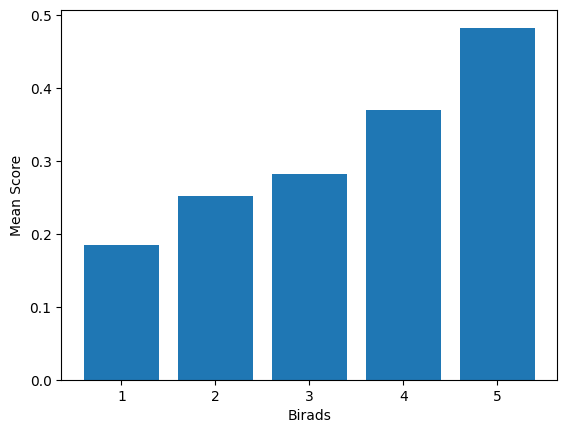

In [49]:
mean_confidence_birad = ai_results.groupby('Birads')['confidence'].mean()

plt.bar(range(1,6), mean_confidence_birad[1:6])
plt.xlabel('Birads')
plt.ylabel('Mean Score')


In [38]:
#convert birads to int
ai_results['Birads'] = ai_results['Birads'].astype(int)

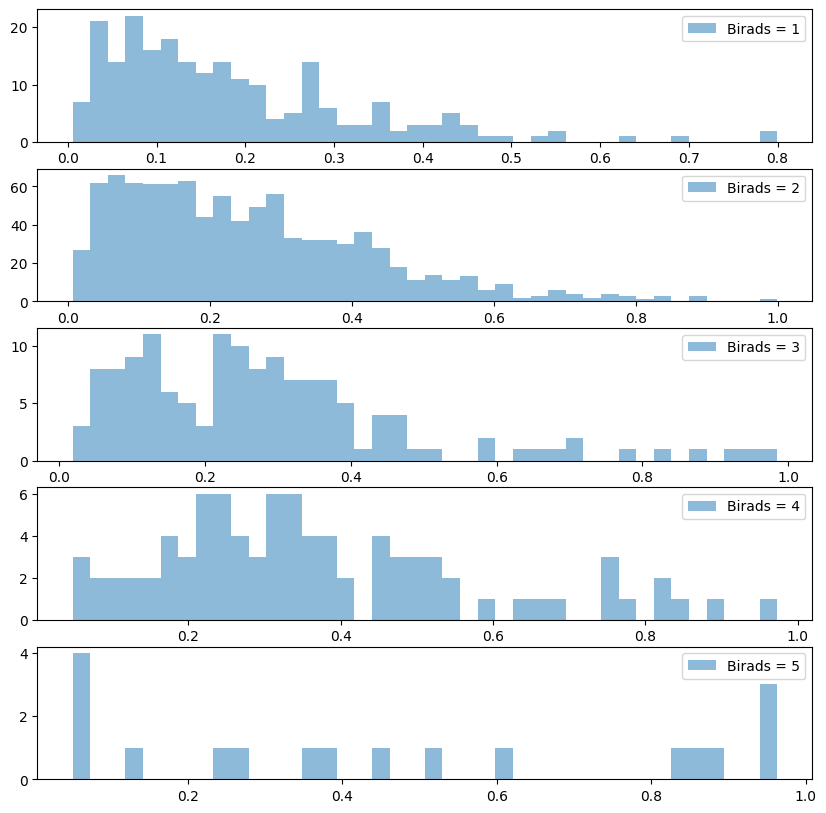

In [46]:
fig, axes = plt.subplots(5,1, figsize=(10,10))

for birads in range(1,6):
    selected_scores= ai_results[ai_results['Birads'] == birads]
    ax = axes[birads-1]
    ax.hist(selected_scores['confidence'], bins=40, alpha=0.5, label=f'Birads = {birads}' )
    ax.legend()
    
plt.legend()